## R section:

In [8]:
getwd()

[1] "/mnt/d/Daneshga/Term 8/Computational Genomics/HW1"

## 5.

In [9]:
table_Q = read.table("hapmap3-files/hapmap3.3.Q")

In [10]:
head(table_Q)

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1,0.000010,0.896321,0.103669
2,0.009659,0.830876,0.159465
3,0.055770,0.725441,0.218790
4,0.000010,0.866447,0.133543
5,0.029255,0.888970,0.081775
6,0.009302,0.859576,0.131122


In [11]:
print(dim(table_Q))

[1] 324   3


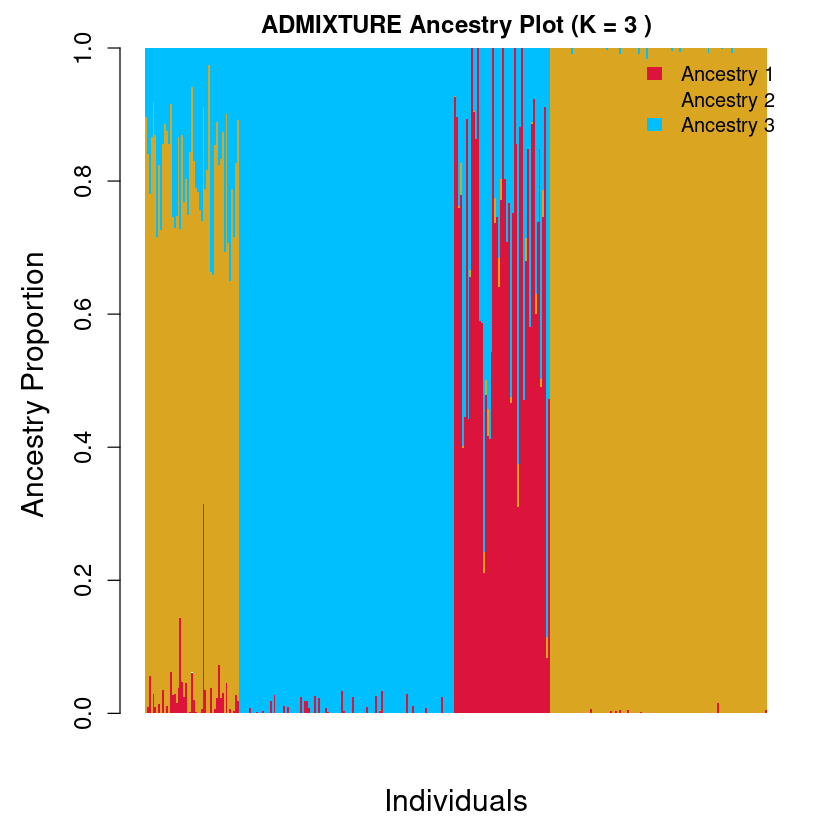

In [12]:
colors <- c("#DC143C", "#DAA520", "#00BFFF")

par(mar = c(5, 5, 2, 2), cex.axis = 1.2, cex.lab = 1.5, cex.main = 1.2)

barplot(t(as.matrix(table_Q)), col=colors,
        xlab="Individuals", ylab="Ancestry Proportion", space=0,
        border=NA, main = paste("ADMIXTURE Ancestry Plot (K =", 3, ")"))

legend("topright", legend=paste("Ancestry", 1:3),
       fill=colors, bty="n",
       border=NA, cex=1)

The Q plot generated by ADMIXTURE shows individual-level ancestry proportions across the inferred ancestral populations (in this case, K = 3). Each individual is represented by a stacked bar, where the colors represent the estimated proportion of ancestry from each of the three populations.

## 6.

In [13]:
table_P = read.table("hapmap3-files/hapmap3.3.P")

In [14]:
head(table_P)

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1,0.999990,0.999990,0.999990
2,0.946581,0.934992,0.901852
3,0.989626,0.382598,0.918612
4,0.973109,0.682057,0.907595
5,0.678695,0.918927,0.129153
6,0.999990,0.999990,0.999990


In [15]:
cat("Number of SNPs used in the ADMIXTURE analysis:", nrow(table_P), "\n")

Number of SNPs used in the ADMIXTURE analysis: 13928 


How many SNPs were used in the ADMIXTURE analysis?
The .P file contains the population-specific allele frequencies for each SNP across K ancestral populations.
So, the number of rows in the .P file corresponds to the number of SNPs used in the analysis.

## 7.

In [16]:
P_var <- apply(table_P, 1, var)

In [17]:
print(head(P_var))

[1] 0.0000000000 0.0005388747 0.1101394982 0.0233117901 0.1639084658
[6] 0.0000000000


In [18]:
length(P_var)

[1] 13928

In [19]:
max_var_index <- which.max(P_var)
min_var_index <- which.min(P_var)

In [20]:
max_var_afs <- table_P[max_var_index, ]
min_var_afs <- table_P[min_var_index, ]

highest cross-population variance:

In [21]:
max_var_index

[1] 13465

In [22]:
P_var[max_var_index]

[1] 0.309252

In [23]:
max_var_afs

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
13465,0.931699,0.004461,0.99999


lowest cross-population variance:

In [24]:
min_var_index

[1] 1

In [25]:
P_var[min_var_index]

[1] 0

In [26]:
min_var_afs

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1,0.99999,0.99999,0.99999


By calculating the variance of allele frequencies across populations (per SNP), we can:

Identify SNPs that differ strongly in AF across populations → high variance (likely ancestry-informative markers).

Identify SNPs that are similarly distributed across populations → low variance (likely shared variation).